# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import matplotlib.dates as mdates
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load the Data

In [3]:
df_data = pd.read_csv('./mission_launches_updated.csv', parse_dates=['Datetime'])
df_data.drop('Unnamed: 0', axis=1, inplace=True)

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.sample(5)


,Organisation,Location,Datetime,Details,Status,Price,Mission_status
5208,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Nov 19, 1971 12:00 UTC",Voskhod | Cosmos 456,Retired,NaN,Partial Failure
4025,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Jul 17, 1981 08:00 UTC",Soyuz U | Cosmos 1283,Retired,20.00,Success
5193,US Air Force,"SLC-1W (75-3-4), Vandenberg SFB, California, USA","Tue Dec 14, 1971 12:13 UTC",Thorad SLV-2G Agena-D | OPS 7898,Retired,NaN,Success
1879,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu May 08, 2003 11:28 UTC",GSLV Mk I | GSAT-2,Retired,47.00,Success
1723,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Dec 21, 2005 22:33 UTC",Ariane 5 GS | INSAT-4A & MSG-2,Retired,NaN,Success


In [5]:

df_data.shape
df_data.Datetime = df_data.Datetime.astype(str).str.replace(" UTC", "")
df_data.Datetime = df_data.Datetime.astype(str).str.strip()


*Changing the datetime column to pd.Datetime for easy calculations*

*Found two formats of dates, converting each format*

In [6]:
date1 = pd.to_datetime(df_data['Datetime'], errors='coerce', format='%a %b %d, %Y %H:%M')
date2 = pd.to_datetime(df_data['Datetime'], errors='coerce', format='%a %b %d, %Y')
df_data['Datetime'] = date1.fillna(date2)

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    6510 non-null   object        
 1   Location        6510 non-null   object        
 2   Datetime        6510 non-null   datetime64[ns]
 3   Details         6510 non-null   object        
 4   Status          6510 non-null   object        
 5   Price           2475 non-null   float64       
 6   Mission_status  6510 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 356.1+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_updated = df_data.dropna()

In [9]:
df_updated.sample(5)

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
1076,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2014-07-14 15:15:00,Falcon 9 Block 2 (v1.1) | OG2 Mission 1,Retired,56.50,Success
522,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-01-15 02:53:00,"Long March 2D | Jilin-1 Kuanfu 01, ÑuSat-7/8 &...",Active,29.75,Success
3692,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1984-02-16 08:15:00,Soyuz U | Cosmos 1537,Retired,20.00,Success
1327,ULA,"SLC-37B, Cape Canaveral SFS, Florida, USA",2011-07-16 06:41:00,"Delta IV Medium+ (4,2) | GPS IIF-2",Retired,164.00,Success
1447,MHI,"LA-Y1, Tanegashima Space Center, Japan",2009-11-28 01:21:00,H-IIA 202 | IGS-Optical 3,Active,90.00,Success


## Descriptive Statistics

In [10]:
df_updated.describe()

,Datetime,Price
count,2475,"2,475.00"
mean,2003-12-18 01:09:46.787878784,70.31
min,1964-09-01 15:00:00,2.50
25%,1988-11-28 12:24:30,20.00
50%,2009-04-04 00:31:00,29.75
75%,2018-01-28 21:52:30,65.00
max,2023-04-16 01:36:00,876.00
std,NaN,104.15


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [11]:
organisation = df_updated.groupby('Organisation', as_index=False).size()
organisation


,Organisation,size
0,ABL SS,1
1,Arianespace,132
2,Astra,7
3,Boeing,7
4,CASC,371
5,CASIC,4
6,EER,1
7,ESA,1
8,Eurockot,13
9,ExPace,17


In [12]:
org = df_data.groupby('Organisation', as_index=False).size()
org.loc[org['Organisation'] == 'NASA']
org.sort_values('size', inplace=True)

In [13]:
fig = px.bar(org, y='Organisation', x='size', text_auto='.2s',title="Launches per Organisation", height=2000, color='size')
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
status = df_data.groupby('Status').size()
status

Status
Active     1370
Retired    5140
dtype: int64

In [15]:
fig = px.pie(status, values=status.values, names=status.index, color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
mission_status = df_data.groupby('Mission_status').size()
mission_status

Mission_status
Failure               448
Partial Failure       112
Prelaunch Failure       8
Success              5942
dtype: int64

In [17]:
fig = px.pie(mission_status, values=mission_status.values, names=mission_status.index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [18]:
fig = px.histogram(df_data, x="Price")
fig.show()

c:\Users\Aneeq\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



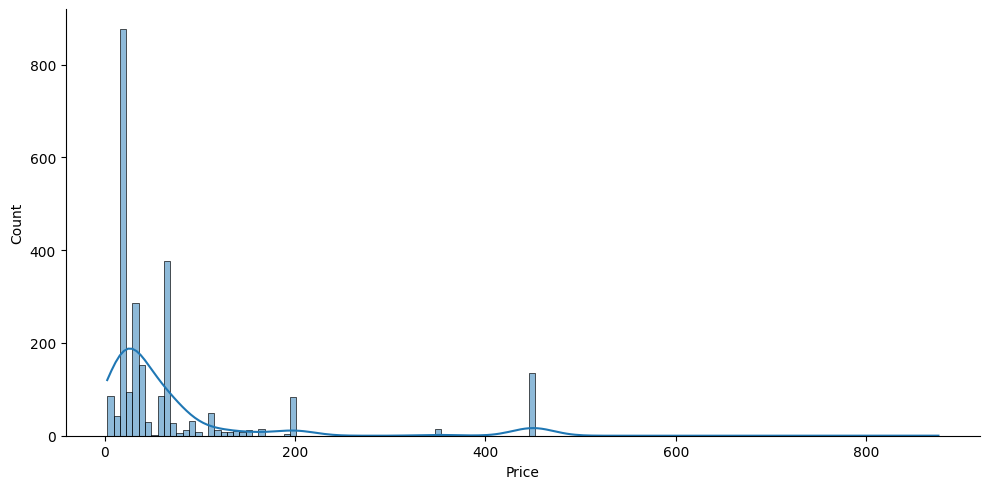

In [19]:
sns.displot(df_data, x='Price', kde=True, aspect=2)

# Using a Choropleth Map to Show the Number of Launches by Country

* Creating a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* We'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

We'll need to use a 3 letter country code for each country. We might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


We can use the iso3166 package to convert the country names to Alpha3 format.

In [20]:
df_data['Country'] = df_data.Location.astype(str).str.split(',').str[-1]
df_data.Country = df_data.Country.str.strip()

In [21]:
df_data = df_data.replace(['Barents Sea'], 'Russian Federation')
df_data = df_data.replace(['Russia'], 'Russian Federation')
df_data = df_data.replace(['Yellow Sea'], 'China')
df_data = df_data.replace(['Pacific Ocean'], 'USA')
df_data = df_data.replace(['Pacific Missile Range Facility'], 'USA')
df_data = df_data.replace(['Gran Canaria'], 'USA')


In [22]:
def do_fuzzy_search(country):
    try:
        result = countries.get(country)
    except Exception:
        return np.nan
    else:
        return result.alpha3
    
iso_map = {country: do_fuzzy_search(country) for country in df_data["Country"].unique()}
df_data["ISO"] = df_data["Country"].map(iso_map)

# Some exceptions doing them manually

df_data.loc[df_data.Country == 'Iran', 'ISO'] = 'IRN'
df_data.loc[df_data.Country == 'United Kingdom', 'ISO'] = 'GBR'
df_data.loc[df_data.Country == 'South Korea', 'ISO'] = 'KOR'
df_data.loc[df_data.Country == 'North Korea', 'ISO'] = 'PRK'

In [23]:
df_data.ISO.isna().values.any()

False

In [24]:
country = df_data.groupby(['Country', 'ISO'], as_index=False).size()
country

,Country,ISO,size
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,525
3,France,FRA,322
4,India,IND,86
5,Iran,IRN,17
6,Israel,ISR,14
7,Japan,JPN,130
8,Kazakhstan,KAZ,1548
9,Kenya,KEN,9


In [25]:
fig = px.choropleth(country, locations="ISO",hover_name="Country",color='size',color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [26]:
failures = df_data.loc[df_data.Mission_status == 'Failure'].groupby(['Country', 'ISO'], as_index=False).size()


In [27]:
fig = px.choropleth(failures, locations="ISO",hover_name="Country",color='size',color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [28]:
data = country = df_data.groupby(['Mission_status','Country', 'Organisation'], as_index=False).size()

fig = px.sunburst(data, path=['Country', 'Organisation', 'Mission_status'], values='size',
                  color='Country', hover_data='size',
                  color_continuous_scale='RdBu')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
df_updated = df_data.dropna()
total_money = df_updated.groupby('Organisation', as_index=False).agg({'Price':pd.Series.sum}).sort_values('Price')


In [30]:
fig = px.bar(total_money[-20:], y='Organisation', x='Price', text_auto='.2s',title="Money Spent in Millions of $", height=1000, color='Price')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [31]:
price_per_launch = df_updated.groupby('Organisation', as_index=False).agg({'Price':pd.Series.sum, 'Country':pd.Series.count}).sort_values('Price')
price_per_launch.rename(columns = {'Country':'Launches'}, inplace = True)
price_per_launch['Avg'] = price_per_launch.Price / price_per_launch.Launches
price_per_launch.sort_values('Avg', inplace=True)


In [32]:
fig = px.bar(price_per_launch, y='Organisation', x='Avg', text_auto='.2s',title="Money Spent in Millions of $", height=1000, color='Avg')
fig.show()

# Chart the Number of Launches per Year

In [33]:
df_data['Year'] = df_data.Datetime.dt.year

In [34]:
yearly = df_data.groupby('Year').agg({'Status':pd.Series.count})
yearly

,Status
Year,
1957,3
1958,28
1959,24
1960,41
1961,56
...,...
2019,107
2020,118
2021,157


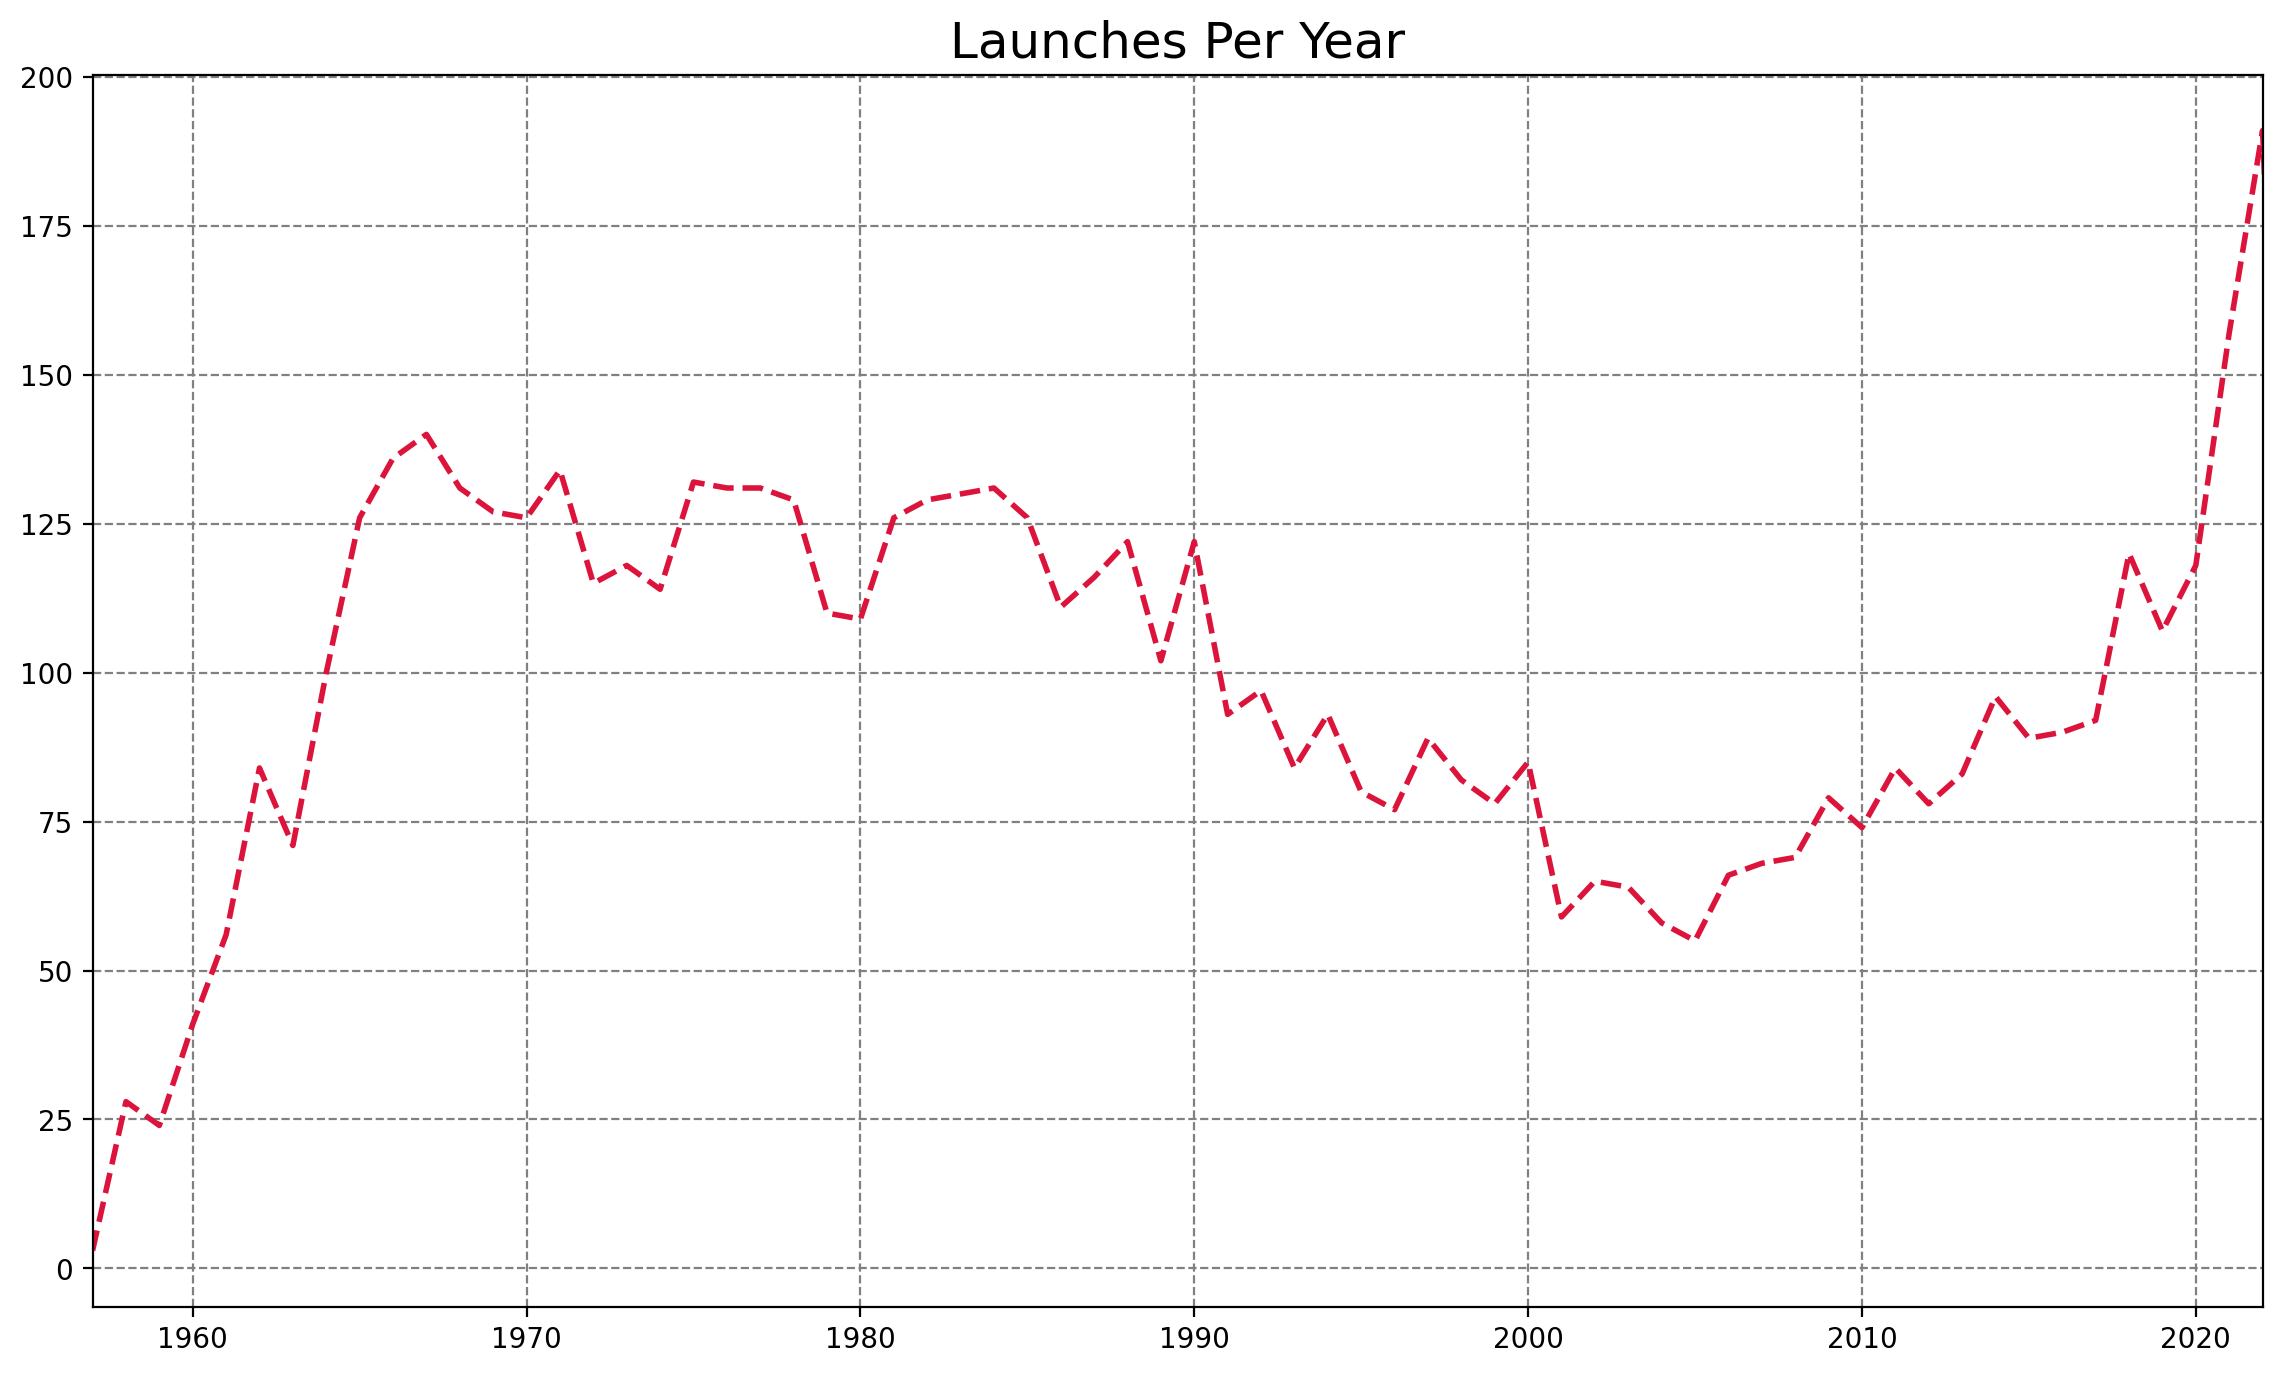

In [35]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Launches Per Year', fontsize=18)

plt.grid(color='grey', linestyle='--')

plt.xlim(1957, 2022)
plt.plot(yearly.index,yearly.Status, linestyle='dashed', color='crimson', linewidth=2)


plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [36]:
monthly = df_data['Datetime'].groupby(df_data.Datetime.dt.to_period("M")).agg('count')
monthly.index = monthly.index.to_timestamp()


In [37]:
rolling_avg = monthly.rolling(window=6).mean()
rolling_avg

Datetime
1957-10-01     NaN
1957-11-01     NaN
1957-12-01     NaN
1958-02-01     NaN
1958-03-01     NaN
              ... 
2022-12-01   18.83
2023-01-01   18.83
2023-02-01   17.67
2023-03-01   18.83
2023-04-01   16.17
Name: Datetime, Length: 783, dtype: float64

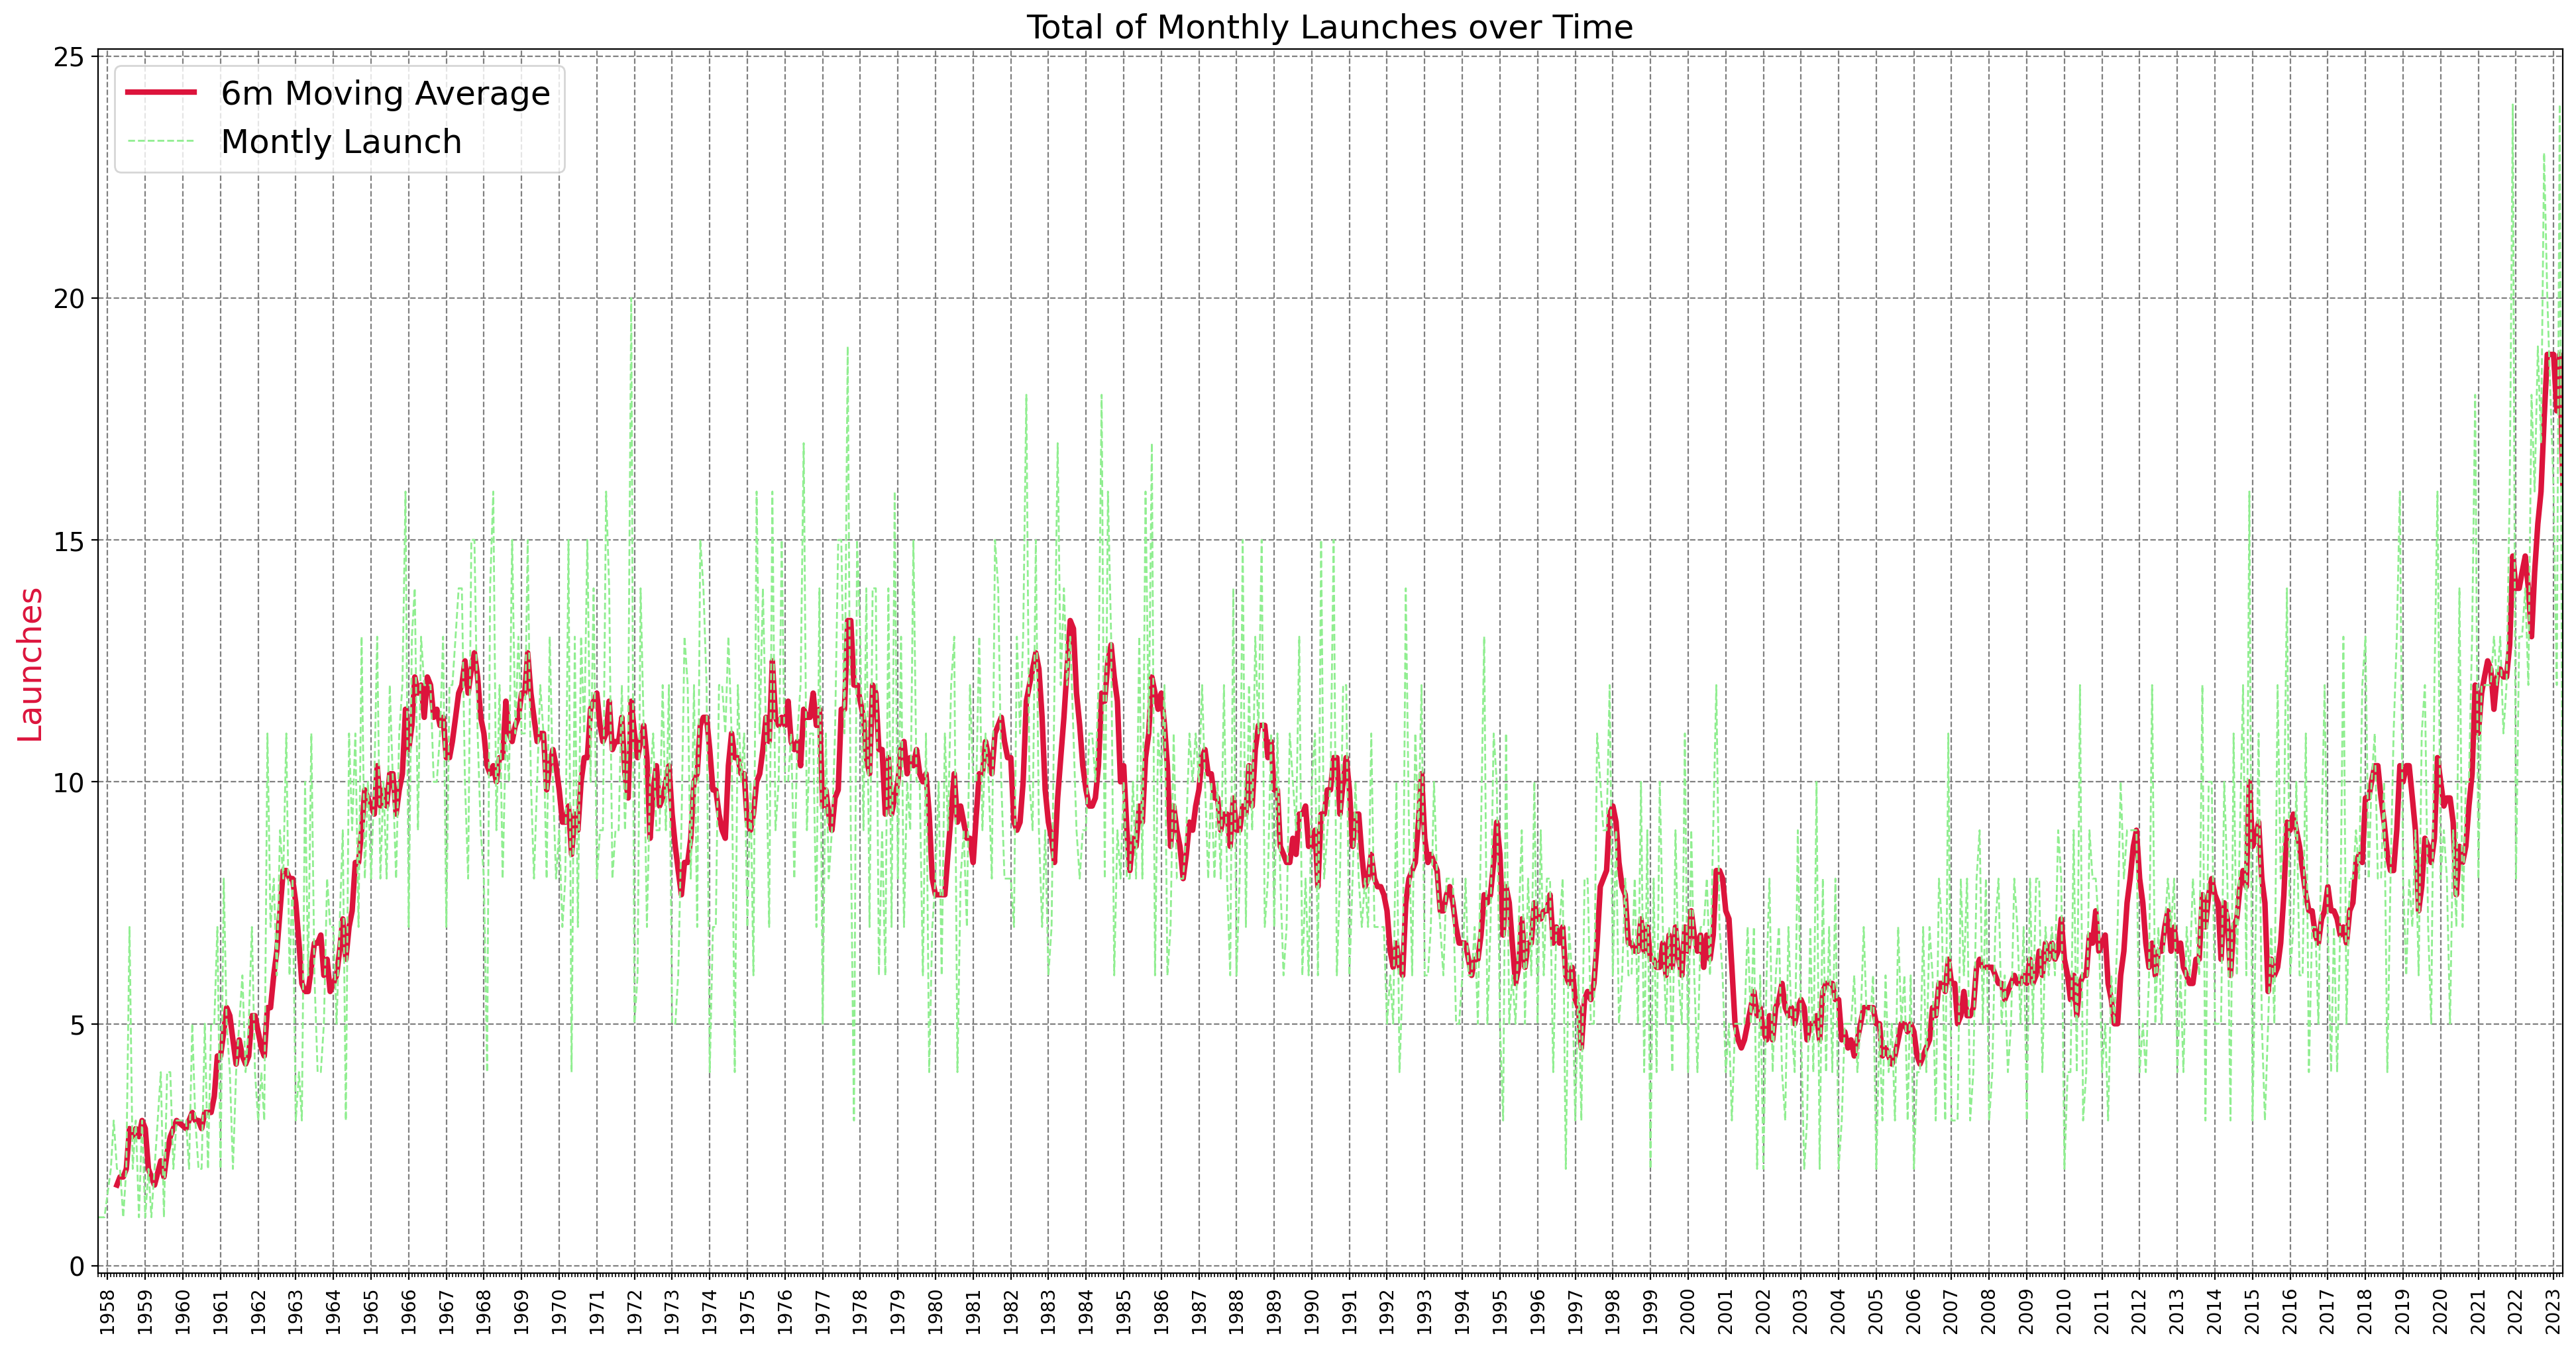

In [38]:
plt.figure(figsize=(24,12), dpi=200)
plt.title('Total of Monthly Launches over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Launches', color='crimson', fontsize=18)
 

years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter("%Y")

plt.xticks(fontsize=10, rotation=90)

ax = plt.gca()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlim([monthly.index.min(), monthly.index.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(rolling_avg.index, 
                    rolling_avg.values, 
                    color='crimson', 
                    linewidth=3, 
                    label='6m Moving Average')

bw_line, = plt.plot(monthly.index, 
                    monthly.values,
                    color='lightgreen', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Montly Launch')

 
plt.legend(handles=[ma_line, bw_line],
           fontsize=18)
 
plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [39]:
month = df_data.groupby(df_data.Datetime.dt.month).agg({'Status':pd.Series.count})
month

,Status
Datetime,
1,395
2,487
3,517
4,565
5,514
6,583
7,533
8,560
9,567


In [40]:
fig = px.bar(month, y='Status', x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'],
              text_auto='.2s',title="Launches per Month", height=600, color='Status',  labels={'Status':'Launches', 'x':'Month'})
fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [41]:
yearly = df_updated.groupby(df_updated.Datetime.dt.year).agg({'Status':pd.Series.count, 'Price':pd.Series.sum})
yearly['Avg'] =  yearly.Price / yearly.Status

In [42]:
fig = px.line(yearly, x=yearly.index, y="Avg", title='Average Price of rocket')
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [43]:
top_10 = df_data.pivot_table(index=df_data.Datetime.dt.year, columns='Organisation', aggfunc='size', fill_value=0)
s = top_10.sum()
top_10 = top_10[s.sort_values(ascending=False).index[:10]]
top_10.columns

Index(['RVSN USSR', 'US Air Force', 'CASC', 'Roscosmos', 'VKS RF',
       'Arianespace', 'General Dynamics', 'SpaceX', 'NASA', 'ULA'],
      dtype='object', name='Organisation')

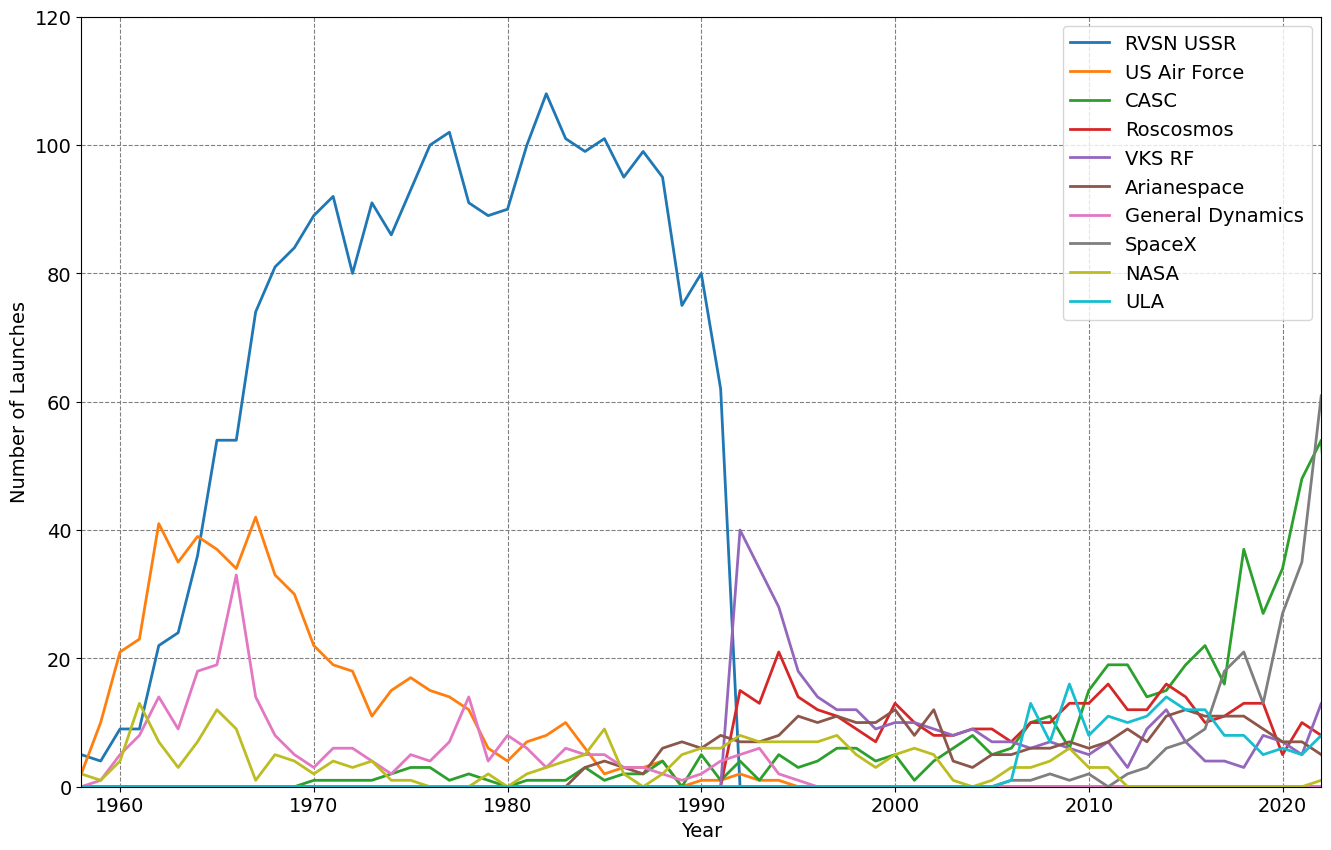

In [44]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 120)
plt.xlim(1958, 2022)
plt.grid(color='grey', linestyle='--')
for column in top_10.columns:
    plt.plot(top_10[column], linewidth=2, label=column)

plt.legend(fontsize=14)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [45]:
war_end = pd.to_datetime('1991-06-01')

In [46]:
cold_war = df_data.loc[df_data.Datetime <= war_end]
cold_war


,Organisation,Location,Datetime,Details,Status,Price,Mission_status,Country,ISO,Year
2840,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1991-05-30 08:04:00,Soyuz U2 | Progress M-8,Retired,40.00,Success,Kazakhstan,KAZ,1991
2841,Boeing,"SLC-17B, Cape Canaveral SFS, Florida, USA",1991-05-29 22:55:00,Delta II 7925 | Aurora 2,Retired,NaN,Success,USA,USA,1991
2842,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1991-05-24 15:29:00,Soyuz U | Cosmos 2149,Retired,20.00,Success,Russian Federation,RUS,1991
2843,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1991-05-21 08:59:00,Soyuz U | Resurs-F,Retired,20.00,Success,Russian Federation,RUS,1991
2844,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1991-05-18 12:50:00,Soyuz U2 | Soyuz TM-12,Retired,40.00,Success,Kazakhstan,KAZ,1991
...,...,...,...,...,...,...,...,...,...,...
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,Retired,NaN,Failure,USA,USA,1958
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",1958-02-01 03:47:00,Juno I | Explorer 1,Retired,NaN,Success,USA,USA,1958
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,Retired,NaN,Failure,USA,USA,1957
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success,Kazakhstan,KAZ,1957


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [47]:
super_power = cold_war.groupby('Country', as_index=False).agg({'Status':pd.Series.count})
super_power.loc[super_power.Country == 'Kazakhstan', 'Country'] = 'Russian Federation'
super_power = super_power.loc[[6,8,9]]
super_power


,Country,Status
6,Russian Federation,969
8,Russian Federation,1474
9,USA,1065


In [48]:
fig = px.pie(super_power, values=super_power.Status, names=super_power.Country, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [49]:
super_power = cold_war.pivot_table(index=cold_war.Datetime.dt.year, columns='Country', aggfunc='size', fill_value=0)
s = super_power.sum()
super_power['Russian Federation'] = super_power['Russian Federation'].add(super_power['Kazakhstan'])
super_power = super_power[s.sort_values(ascending=False).index[:2]]
super_power

Country,Russian Federation,USA
Datetime,,
1957,2,1
1958,5,23
1959,4,20
1960,9,32
1961,9,47
1962,22,62
1963,24,47
1964,36,64
1965,54,71


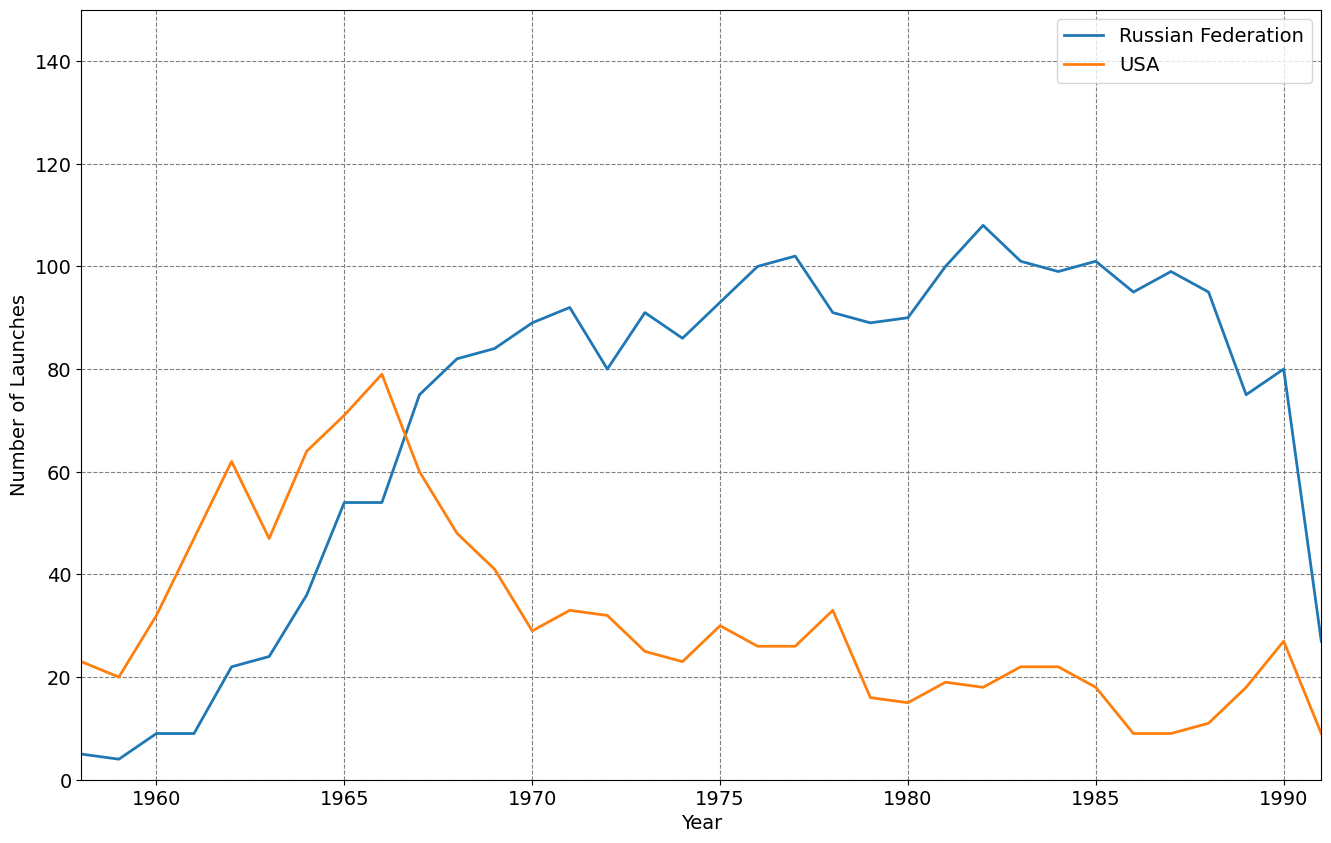

In [50]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 150)
plt.xlim(1958, 1991)
plt.grid(color='grey', linestyle='--')
for column in super_power:
    plt.plot(super_power[column], linewidth=2, label=column)

plt.legend(fontsize=14)

## Chart the Total Number of Mission Failures Year on Year.

In [51]:
failures = df_data.pivot_table(index=df_data.Datetime.dt.year, columns='Mission_status', aggfunc='size', fill_value=0)
s = failures.sum()
failures = failures[s.sort_values(ascending=True).index[:3]]
failures


Mission_status,Prelaunch Failure,Partial Failure,Failure
Datetime,,,
1957,0,0,1
1958,0,2,20
1959,0,3,11
1960,0,0,21
1961,0,3,19
...,...,...,...
2019,1,0,5
2020,0,2,10
2021,0,3,11


In [52]:
failures = df_data.groupby([df_data.Datetime.dt.year, 'Mission_status'], as_index=False).agg('size')
failures = failures[failures.Mission_status != 'Success']
failures.sort_values('size', inplace=True, ascending=True)

In [53]:
fig = px.bar(failures, x=failures.Datetime, y='size' ,color=failures.Mission_status)
fig.update_layout(xaxis_title='Year', yaxis_title='Count',)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [54]:
failures_pct = df_data.pivot_table(index=df_data.Datetime.dt.year, columns='Mission_status', aggfunc='size', fill_value=0)
s = failures_pct.sum()
failures_pct['Percentage'] = (failures_pct['Failure'] + failures_pct['Partial Failure'] + failures_pct['Prelaunch Failure']) / (failures_pct['Failure'] + failures_pct['Partial Failure'] + failures_pct['Prelaunch Failure'] + failures_pct['Success']) * 100
failures_pct = failures_pct['Percentage']

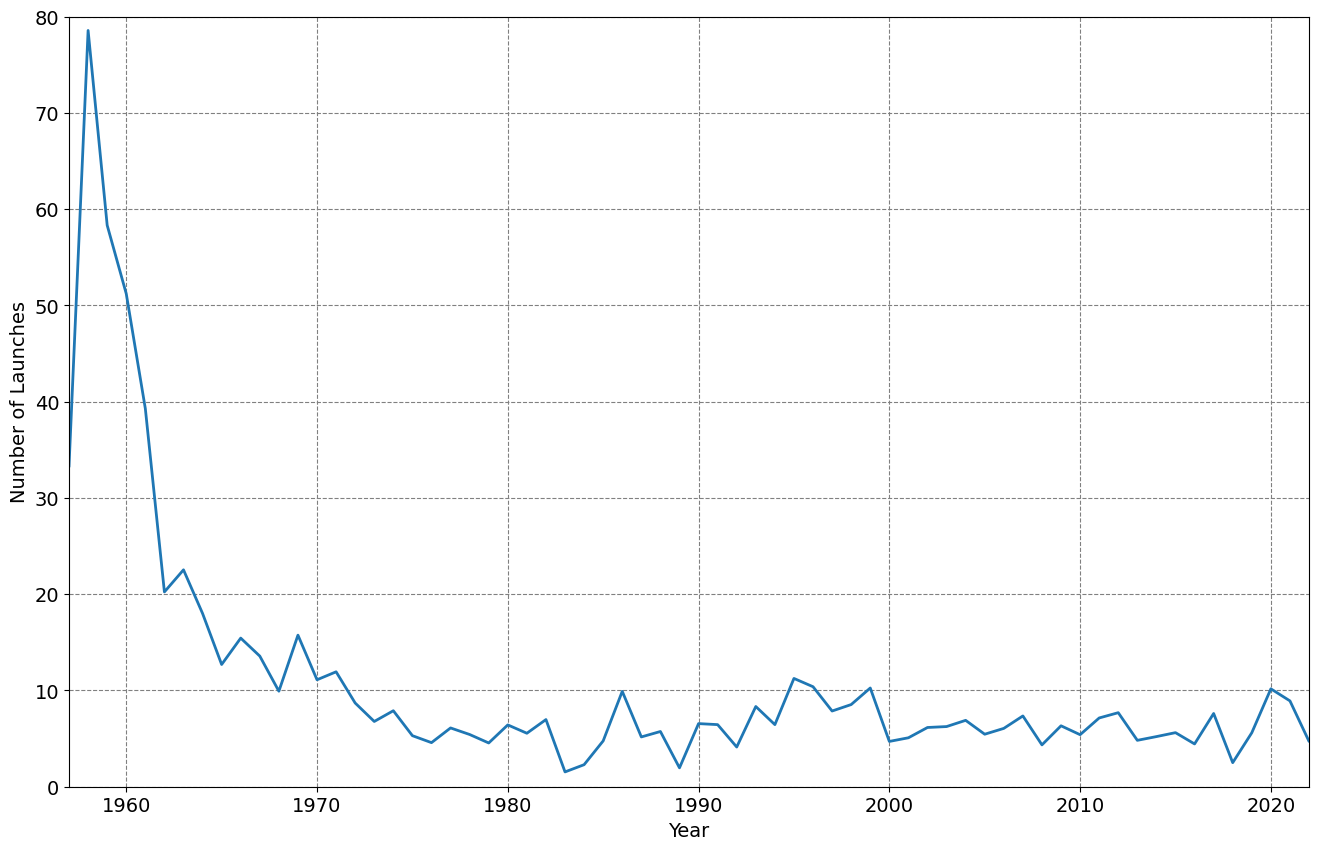

In [55]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 80)
plt.xlim(1957, 2022)
plt.grid(color='grey', linestyle='--')

plt.plot(failures_pct, linewidth=2, label=column)


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [56]:
country = df_data.pivot_table(index=df_data.Datetime.dt.year, columns='Country', aggfunc='size', fill_value=0)


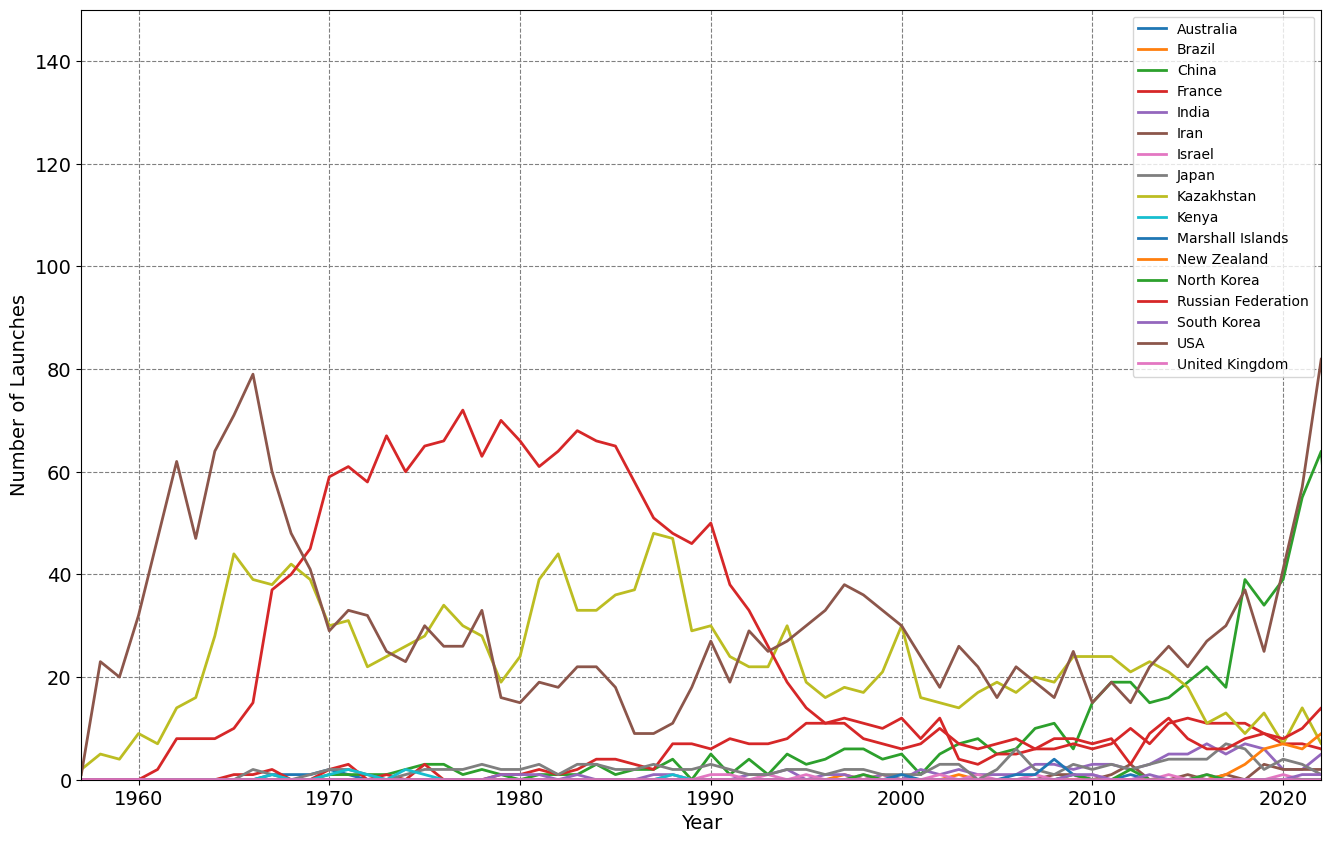

In [57]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 150)
plt.xlim(1957, 2022)
plt.grid(color='grey', linestyle='--')
for column in country:
    plt.plot(country[column], linewidth=2, label=column)

plt.legend(fontsize=10)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [60]:
org = df_data.pivot_table(index=df_data.Datetime.dt.year, columns='Organisation', aggfunc='size', fill_value=0)
org

Organisation,ABL SS,ABMA,AEB,ASI,Arianespace,Armée de l'Air,Astra,Blue Origin,Boeing,CAS Space,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Galactic,Virgin Orbit,i-Space
Datetime,,,,,,,,,,,,,,,,,,,,,
1957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1958,0,7,0,0,0,0,0,0,0,0,...,0,0,0,2,12,0,0,0,0,0
1959,0,4,0,0,0,0,0,0,0,0,...,0,0,0,10,4,0,0,0,0,0
1960,0,2,0,0,0,0,0,0,0,0,...,0,0,0,21,0,0,0,0,0,0
1961,0,3,0,0,0,0,0,0,0,0,...,0,0,0,23,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,9,0,0,3,0,0,...,13,0,5,0,0,0,8,1,0,1
2020,0,0,0,0,7,0,2,1,0,0,...,27,3,6,0,0,0,7,1,1,0
2021,0,0,0,0,7,0,2,6,0,0,...,35,8,5,0,0,0,5,2,2,2


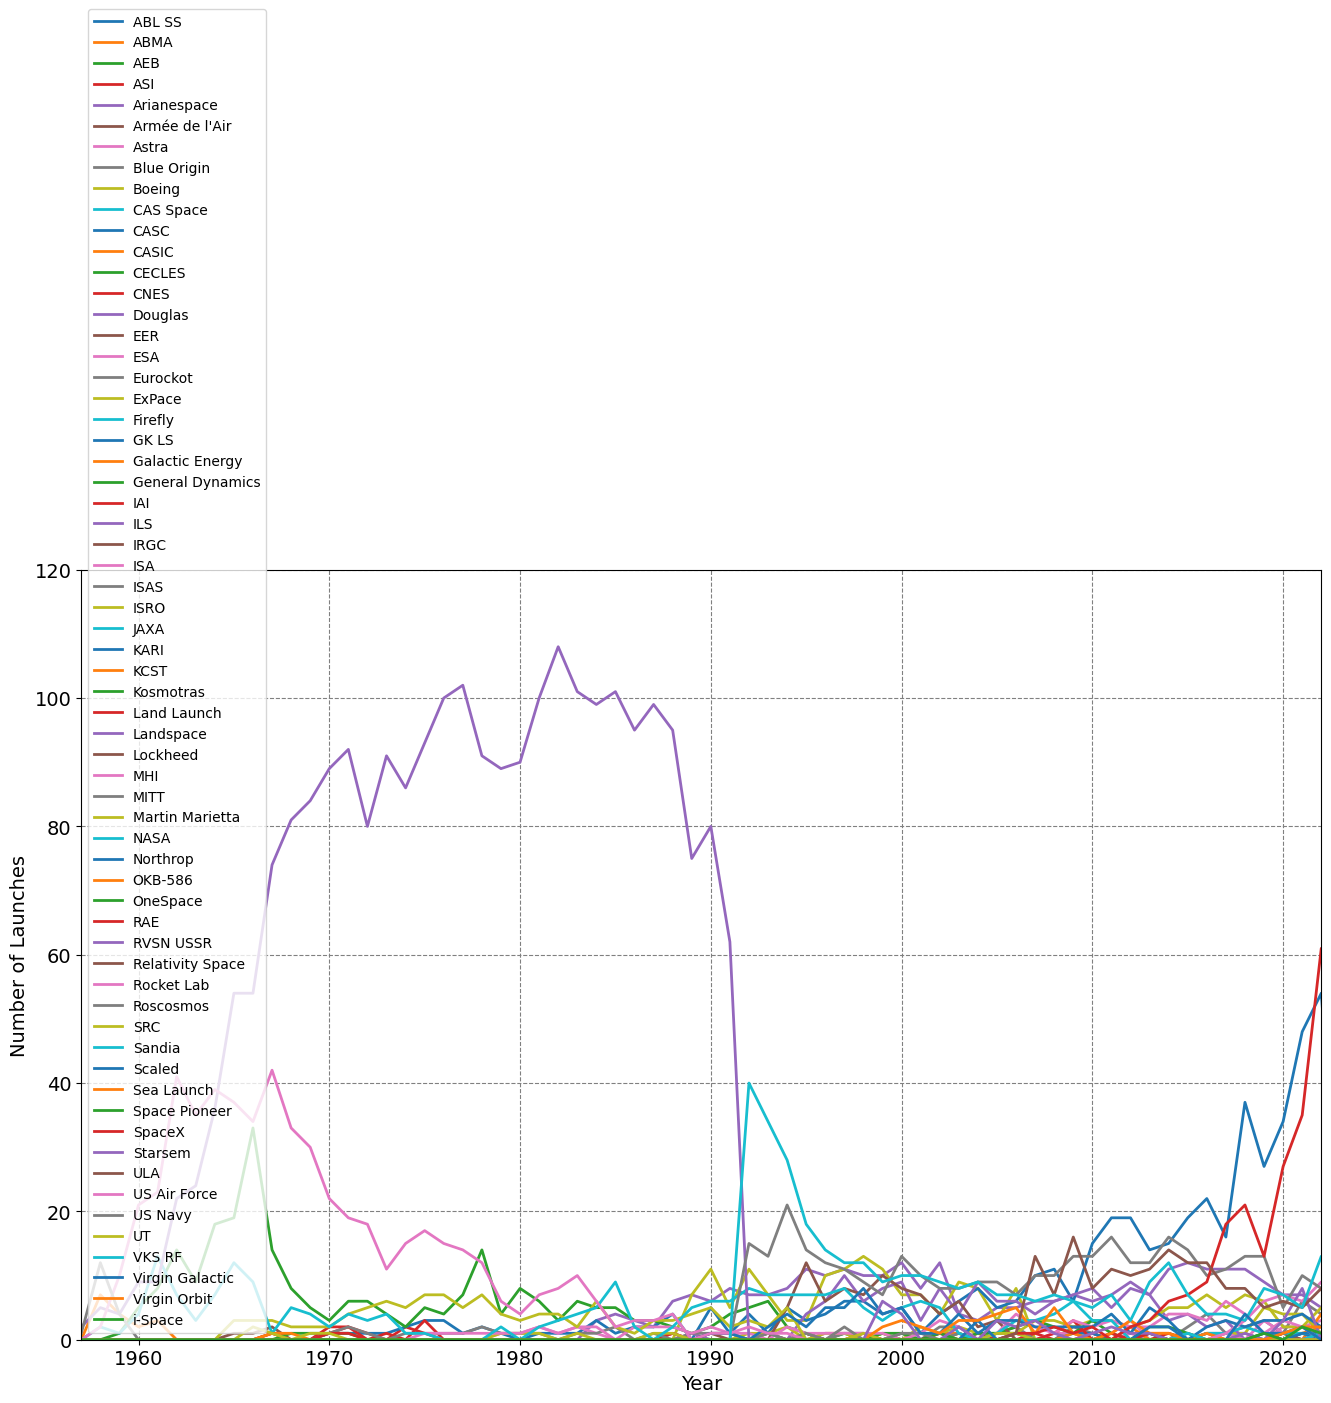

In [61]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.ylim(0, 120)
plt.xlim(1957, 2022)
plt.grid(color='grey', linestyle='--')
for column in org:
    plt.plot(org[column], linewidth=2, label=column)

plt.legend(fontsize=10)